# Predicting athlete’s award

Data from: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/version/2#_=_

> Done By:

> FS7		U1822798C	SUTHAKAR SHINY GLADDYS

> FS7		U1820968H	HO XUAN RONG ZANE

In [2]:
#Import libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import seaborn as sb
sb.set() # set the default Seaborn style for graphics

import plotly.offline as py
import warnings
warnings.filterwarnings('ignore')
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
athletedata=pd.read_csv('athlete_events.csv')
nocdata=pd.read_csv('noc_regions.csv')

In [4]:
nocdata.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
nocdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
NOC       230 non-null object
region    227 non-null object
notes     21 non-null object
dtypes: object(3)
memory usage: 5.5+ KB


In [6]:
print(athletedata.shape)
print(nocdata.shape)

(271116, 15)
(230, 3)


In [7]:
print(athletedata.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


Note: Age, Height, Weight and Medal have null value, we need to clean it.

In [8]:
athletedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [9]:
athletedata.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# Data Preparation and Cleaning of Data

In [10]:
# Create a copy of the Dataset
atheleteClean = athletedata.copy()

#fill NA in medal with 'No Medal'
atheleteClean['Medal'].fillna('No Medal', inplace=True)

#drop row if any of Age, Weight, Height is na
atheleteClean.dropna(inplace=True)

#reset index
atheleteClean.reset_index(drop=True, inplace=True)

In [11]:
atheleteClean.shape

(206165, 15)

In [12]:
print(atheleteClean.isnull().sum())

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64


### Merging the two dataset (atheleteClean and nocdata) to get region

In [13]:
# merging
atheletenocClean = atheleteClean.merge(nocdata,
                                left_on = 'NOC',
                                right_on = 'NOC',
                                how = 'left')

In [14]:
# Check NOCs that didnt have a matching country
atheletenocClean.loc[atheletenocClean['region'].isnull(),['NOC', 'Team']].drop_duplicates()

,NOC,Team
2046,SGP,Singapore
4805,ROT,Refugee Olympic Athletes
33458,SGP,June Climene
48211,TUV,Tuvalu
72856,SGP,Rika II
81401,SGP,Singapore-2
179166,SGP,Singapore-1


In [15]:
# Replace missing region
atheletenocClean['region'] = np.where(atheletenocClean['NOC']=='SGP', 'Singapore', atheletenocClean['region'])
atheletenocClean['region'] = np.where(atheletenocClean['NOC']=='ROT', 'Refugee Olympic Athletes', atheletenocClean['region'])
atheletenocClean['region'] = np.where(atheletenocClean['NOC']=='TUV', 'Tuvalu', atheletenocClean['region'])

#drop duplicates
atheletenocClean.drop_duplicates(inplace=True,keep='first')

atheletenocClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206152 entries, 0 to 206164
Data columns (total 17 columns):
ID        206152 non-null int64
Name      206152 non-null object
Sex       206152 non-null object
Age       206152 non-null float64
Height    206152 non-null float64
Weight    206152 non-null float64
Team      206152 non-null object
NOC       206152 non-null object
Games     206152 non-null object
Year      206152 non-null int64
Season    206152 non-null object
City      206152 non-null object
Sport     206152 non-null object
Event     206152 non-null object
Medal     206152 non-null object
region    206152 non-null object
notes     3493 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 28.3+ MB


In [16]:
#drop un-needed cols
atheletenocClean = atheletenocClean.drop(columns="Team")
atheletenocClean = atheletenocClean.drop(columns="NOC")
atheletenocClean = atheletenocClean.drop(columns="City")
atheletenocClean = atheletenocClean.drop(columns="notes")
atheletenocClean = atheletenocClean.drop(columns="Name")

atheletenocClean.shape

(206152, 12)

In [17]:
atheletenocClean.head()

,ID,Sex,Age,Height,Weight,Games,Year,Season,Sport,Event,Medal,region
0,1,M,24.0,180.0,80.0,1992 Summer,1992,Summer,Basketball,Basketball Men's Basketball,No Medal,China
1,2,M,23.0,170.0,60.0,2012 Summer,2012,Summer,Judo,Judo Men's Extra-Lightweight,No Medal,China
2,5,F,21.0,185.0,82.0,1988 Winter,1988,Winter,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands
3,5,F,21.0,185.0,82.0,1988 Winter,1988,Winter,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal,Netherlands
4,5,F,25.0,185.0,82.0,1992 Winter,1992,Winter,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands


__Adding derived predictor (BMI) and Prepare categorical predictor using label encoding__

In [18]:
#add new field "BMI"
atheletenocClean['BMI'] = atheletenocClean['Weight']/((atheletenocClean['Height']/100)*(atheletenocClean['Height']/100))


#label encoding for category field
atheletenocClean['Sex'] = pd.Categorical(atheletenocClean['Sex'])
atheletenocClean['Gender Label'] = atheletenocClean['Sex'].cat.codes


atheletenocClean['Sport'] = pd.Categorical(atheletenocClean['Sport'])
atheletenocClean['Sport Label'] = atheletenocClean['Sport'].cat.codes

atheletenocClean['region'] = pd.Categorical(atheletenocClean['region'])
atheletenocClean['Region Label'] = atheletenocClean['region'].cat.codes

atheletenocClean['Event'] = pd.Categorical(atheletenocClean['Event'])
atheletenocClean['Event Label'] = atheletenocClean['Event'].cat.codes

atheletenocClean.head()

,ID,Sex,Age,Height,Weight,Games,Year,Season,Sport,Event,Medal,region,BMI,Gender Label,Sport Label,Region Label,Event Label
0,1,M,24.0,180.0,80.0,1992 Summer,1992,Summer,Basketball,Basketball Men's Basketball,No Medal,China,24.691358,1,6,39,113
1,2,M,23.0,170.0,60.0,2012 Summer,2012,Summer,Judo,Judo Men's Extra-Lightweight,No Medal,China,20.761246,1,26,39,314
2,5,F,21.0,185.0,82.0,1988 Winter,1988,Winter,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands,23.959094,0,43,129,461
3,5,F,21.0,185.0,82.0,1988 Winter,1988,Winter,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal,Netherlands,23.959094,0,43,129,457
4,5,F,25.0,185.0,82.0,1992 Winter,1992,Winter,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands,23.959094,0,43,129,461


# Basic Exploration

In [19]:
# Extract Response and Predictors
y = pd.DataFrame(atheletenocClean['Medal'])
X = pd.DataFrame(atheletenocClean[["Age", "Height", "Weight", "BMI", "Gender Label", "Sport Label", "Region Label", "Event Label"]])


# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (154614, 1) (154614, 8)
Test Set  : (51538, 1) (51538, 8)


In [20]:
# Summary Statistics for Response
print(y_train["Medal"].value_counts())

No Medal    131946
Gold          7657
Bronze        7555
Silver        7456
Name: Medal, dtype: int64


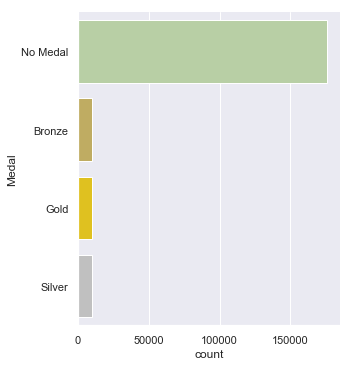

In [21]:
colors = ['#b7d69e', '#ceb552', 'gold', 'silver']
sb.catplot(y = 'Medal', data = atheletenocClean, kind = "count", palette=colors)

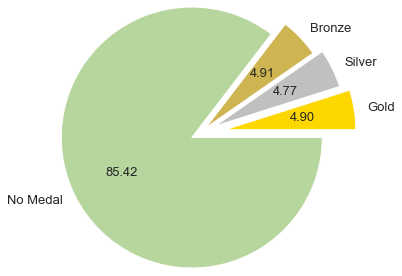

In [22]:
pie_dict_medal = {'Sector': ['Gold', 'Silver', 'Bronze', 'No Medal'],
            'Percentage': [7569/154614*100, 7380/154614*100, 7597/154614*100, 132068/154614*100]}

pie_df_medal = pd.DataFrame(pie_dict_medal)

plt.axis('equal')

colors = ['gold', 'silver', '#ceb552', '#b7d69e']

explode = (0.3, 0.2, 0.1, 0.1)

plt.pie(pie_df_medal['Percentage'], 
        labels=pie_df_medal['Sector'], 
        colors=colors, 
        explode = explode,
        autopct='%.2f',
        radius=1.5,
        textprops={'fontsize': 13})

plt.show()

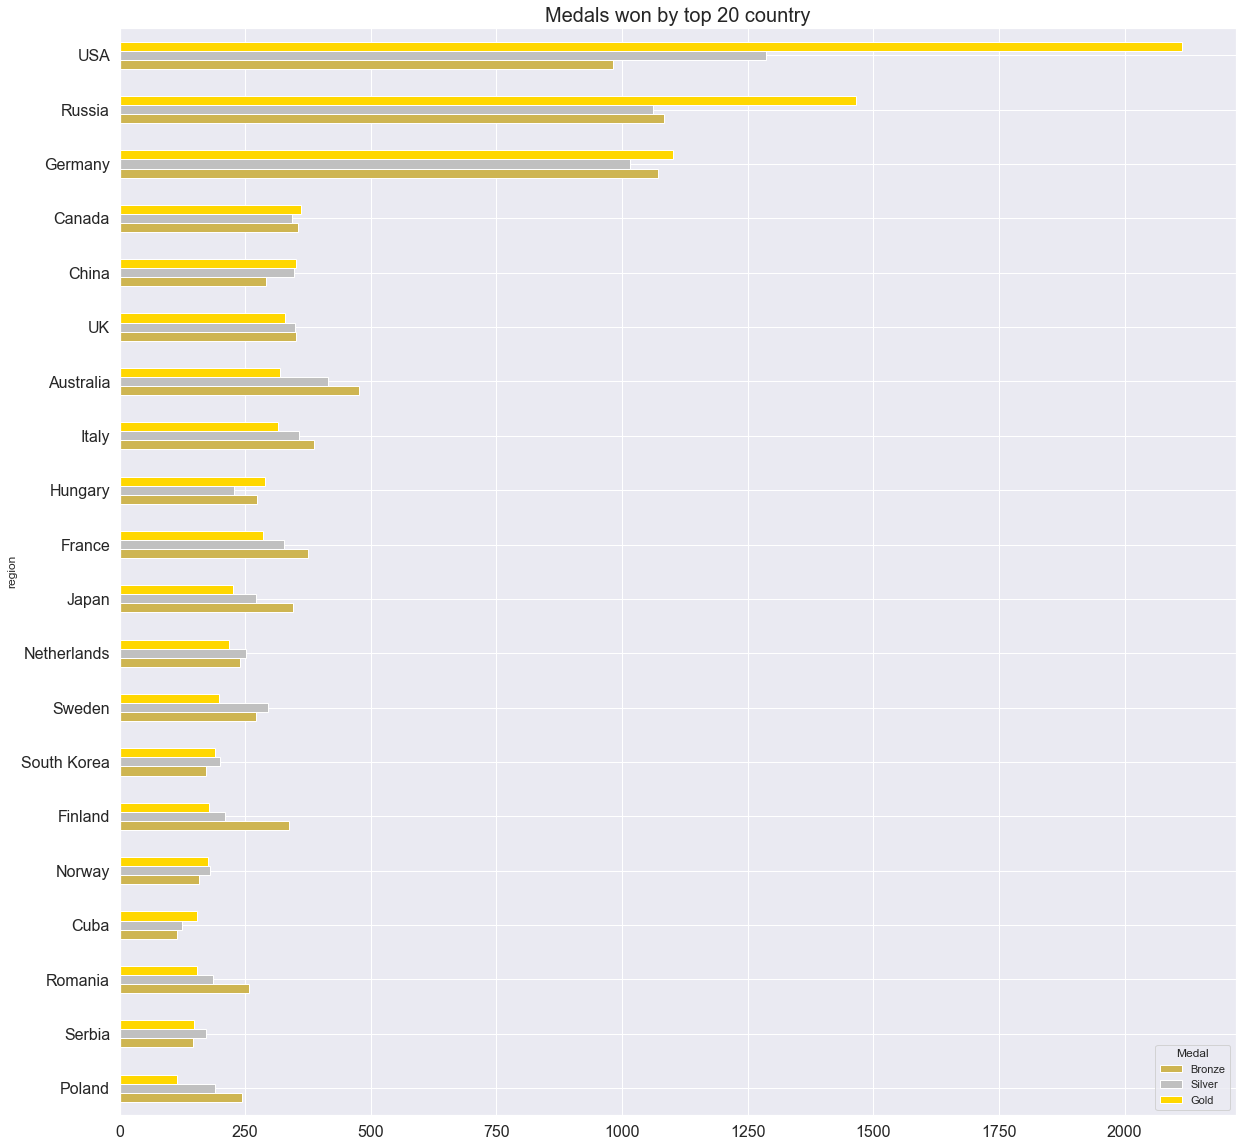

In [23]:
medals_countries=pd.crosstab(atheletenocClean['region'],atheletenocClean['Medal'])
medals_countries = medals_countries.drop(columns="No Medal")
medals_countries = medals_countries[['Bronze', 'Silver', 'Gold']]
medals_countries.sort_values(by=['Gold'], inplace=True)
medals_countries=medals_countries[-20:]

#Barplot for bronze,Gold and Silver medals for each country
#(Only for those countries which have atleast one medal in each category)
colors = ['#ceb552', 'silver', 'gold']

sns.set(rc={'figure.figsize':(20,20)})
set1=medals_countries.loc[medals_countries['Bronze'] >0 ]
set2=set1.loc[medals_countries['Silver'] >0 ]
set3=set2.loc[medals_countries['Gold'] >0 ]

plot4=set3.plot.barh(color=colors, fontsize=16)
plot4.set_title('Medals won by top 20 country', fontsize=20)
plt.show()

In [24]:
test = atheletenocClean.copy()

test = test[test['Medal'] !="No Medal"]
tmp = test.groupby(['region'])["ID"].nunique()
tmp.head(50)

df = pd.DataFrame(data={'Medal': tmp.values}, index=tmp.index).reset_index()

In [25]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


trace = go.Choropleth(
            locations = df['region'],
            locationmode='country names',
            z = df['Medal'],
            text = df['region'],
            autocolorscale = False,
            reversescale = True,
            colorscale = 'Blues',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Count',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Distinct Count of Olympic Medalist By Country',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)

In [26]:
atheletenocClean['Sex'].value_counts()

M    139441
F     66711
Name: Sex, dtype: int64

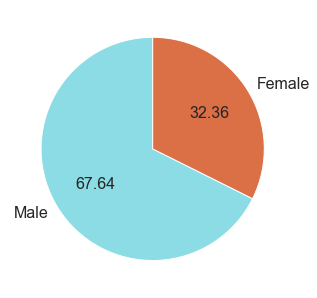

In [27]:
# Draw the distributions of all Predictors
f, axes = plt.subplots(1, 1, figsize=(5, 5))

pie_dict_gender = {'Sector': ['Male', 'Female'],
                   'Percentage': [139441/206152*100, 66711/206152*100]}

pie_df_gender = pd.DataFrame(pie_dict_gender)

plt.axis('equal')

colors = ['#8bdce5', '#db7046']

plt.pie(pie_df_gender['Percentage'], 
        labels=pie_df_gender['Sector'], 
        colors=colors, 
        autopct='%.2f',
        radius=1,
        startangle=90,
        textprops={'fontsize': 16})

plt.show()

#### Explore numeric variables

In [28]:
# Summary Statistics for Predictors
X_train_num = X_train[["Age","Height","Weight","BMI"]]
X_train_num.describe()

,Age,Height,Weight,BMI
count,154614.000000,154614.000000,154614.000000,154614.000000
mean,25.060667,175.382113,70.702727,22.786526
std,5.477309,10.549588,14.319055,2.904441
min,11.000000,127.000000,25.000000,10.503834
25%,21.000000,168.000000,60.000000,20.957171
50%,24.000000,175.000000,70.000000,22.530864
75%,28.000000,183.000000,79.000000,24.218750
max,70.000000,226.000000,214.000000,63.901580


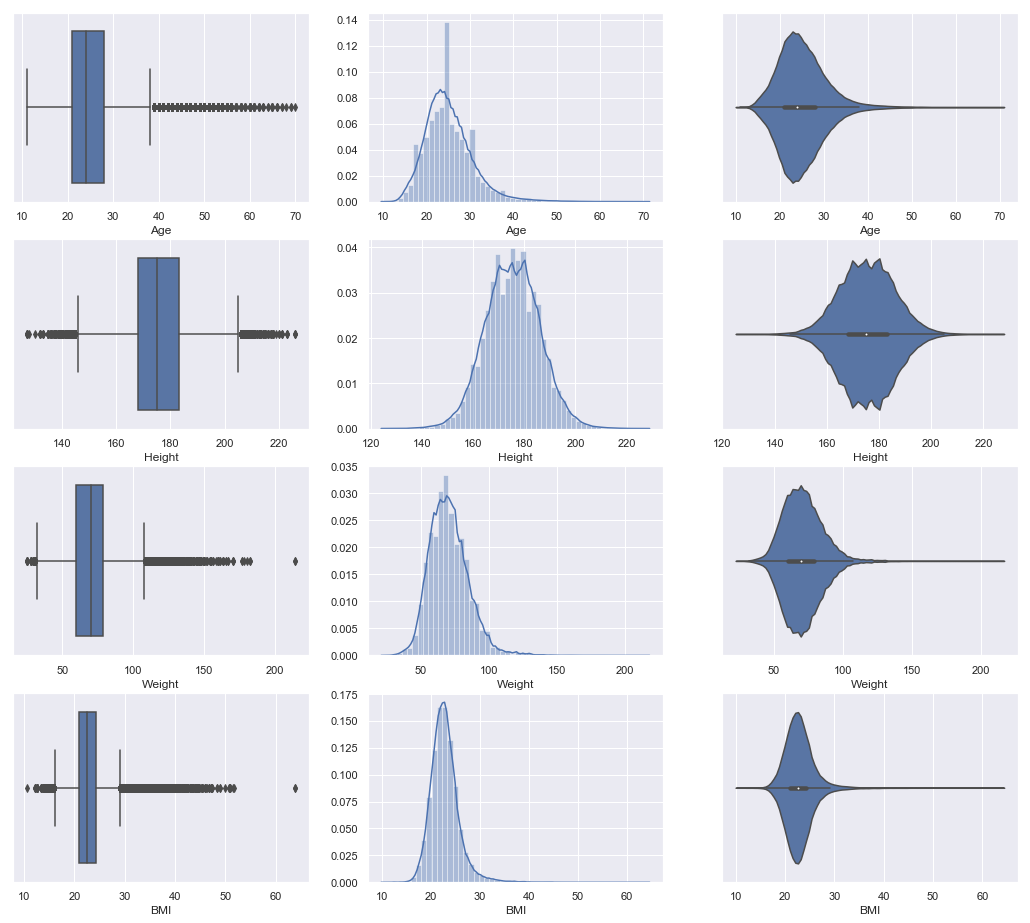

In [29]:
# Draw the distributions of all Predictors
f, axes = plt.subplots(4, 3, figsize=(18, 16))

count = 0
for var in X_train_num:
    sb.boxplot(X_train_num[var], orient = "h", ax = axes[count,0])
    sb.distplot(X_train_num[var], ax = axes[count,1])
    sb.violinplot(X_train_num[var], ax = axes[count,2])
    count += 1

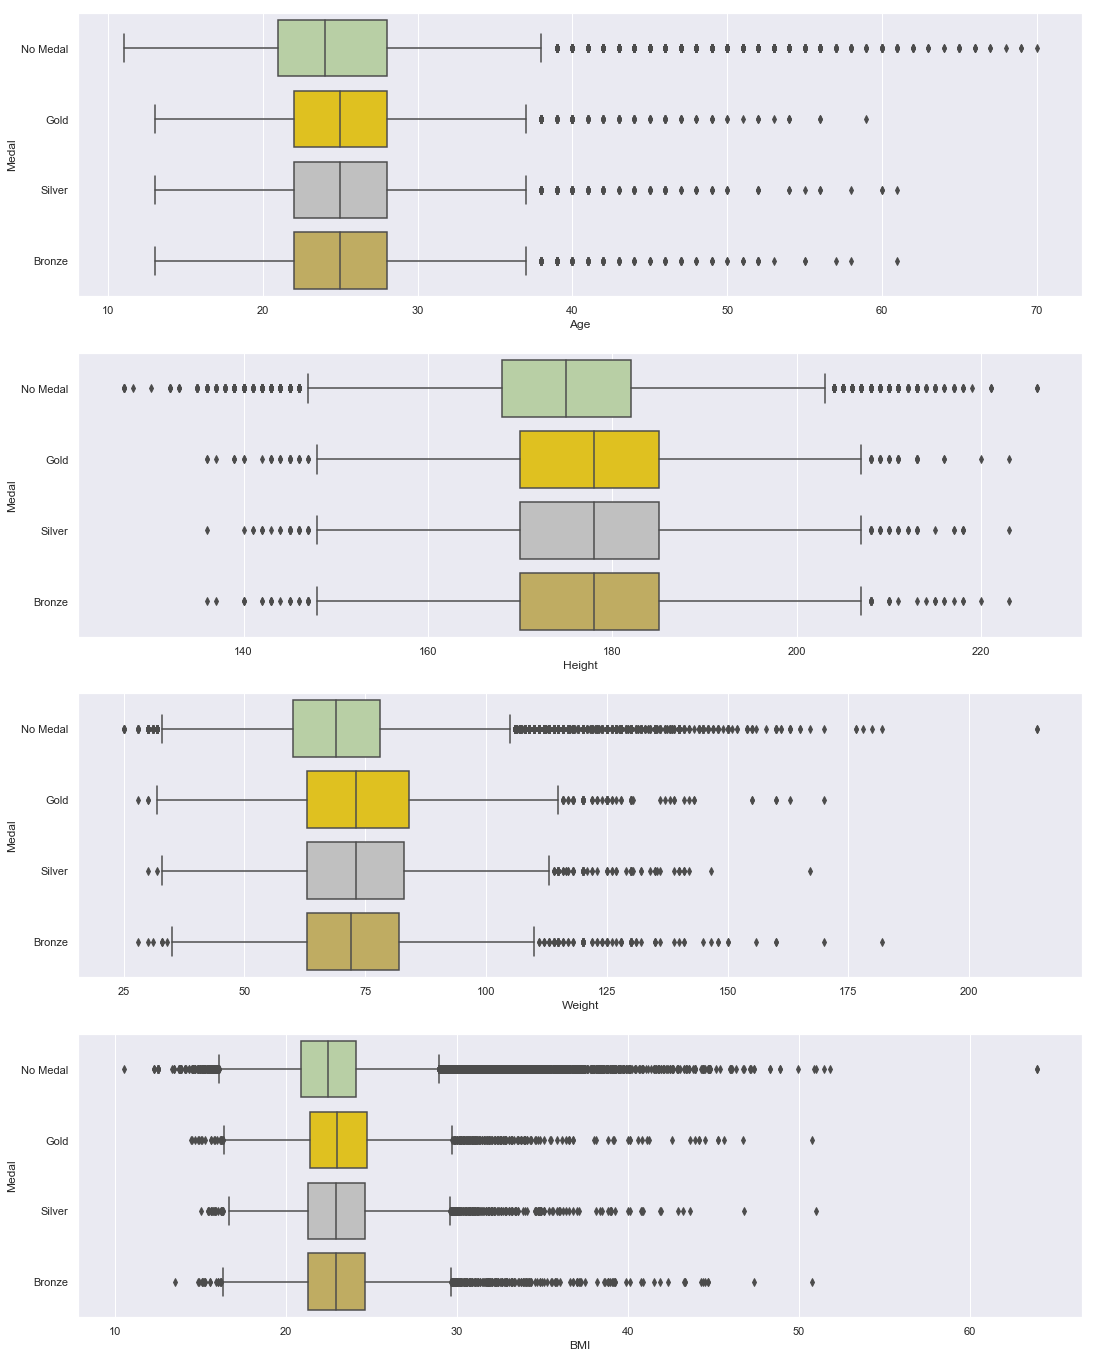

In [30]:
# Relationship between Response and the Predictors
trainDF = pd.concat([y_train, X_train_num], axis = 1, join_axes = [y_train.index])

f, axes = plt.subplots(4, 1, figsize=(18, 24))

color_dict = ['#b7d69e', 'gold', 'silver', '#ceb552']
count = 0
for var in X_train_num:
    sb.boxplot(x = var, y = "Medal", data = trainDF, orient = "h", ax = axes[count], palette=color_dict)
    count += 1

In [31]:
trainDFsample = trainDF.sample(frac=0.05, replace=True, random_state=1)
trainDFsample.shape

(7731, 5)

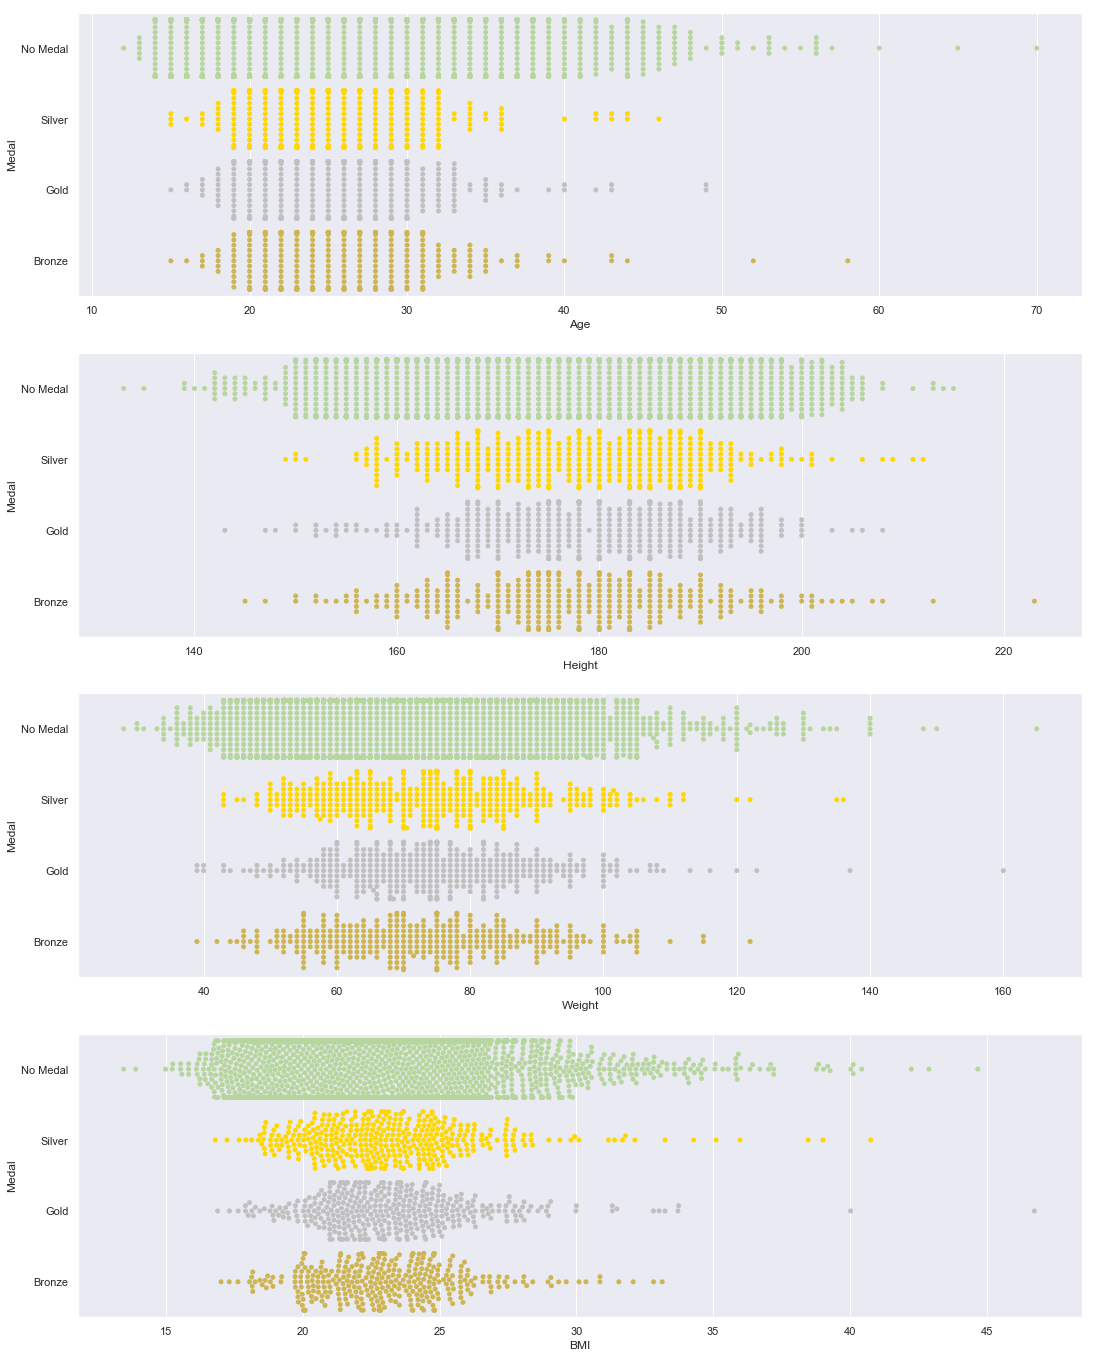

In [105]:
# Joint Swarmplot of Total Train against Legendary Train
f, axes = plt.subplots(4, 1, figsize=(18, 24))

color_dict = ['#b7d69e', 'gold', 'silver', '#ceb552']
count = 0
for var in X_train_num:
    sb.swarmplot(x = var, y = "Medal", data = trainDFsample, orient = "h", ax = axes[count], palette=color_dict)
    count += 1

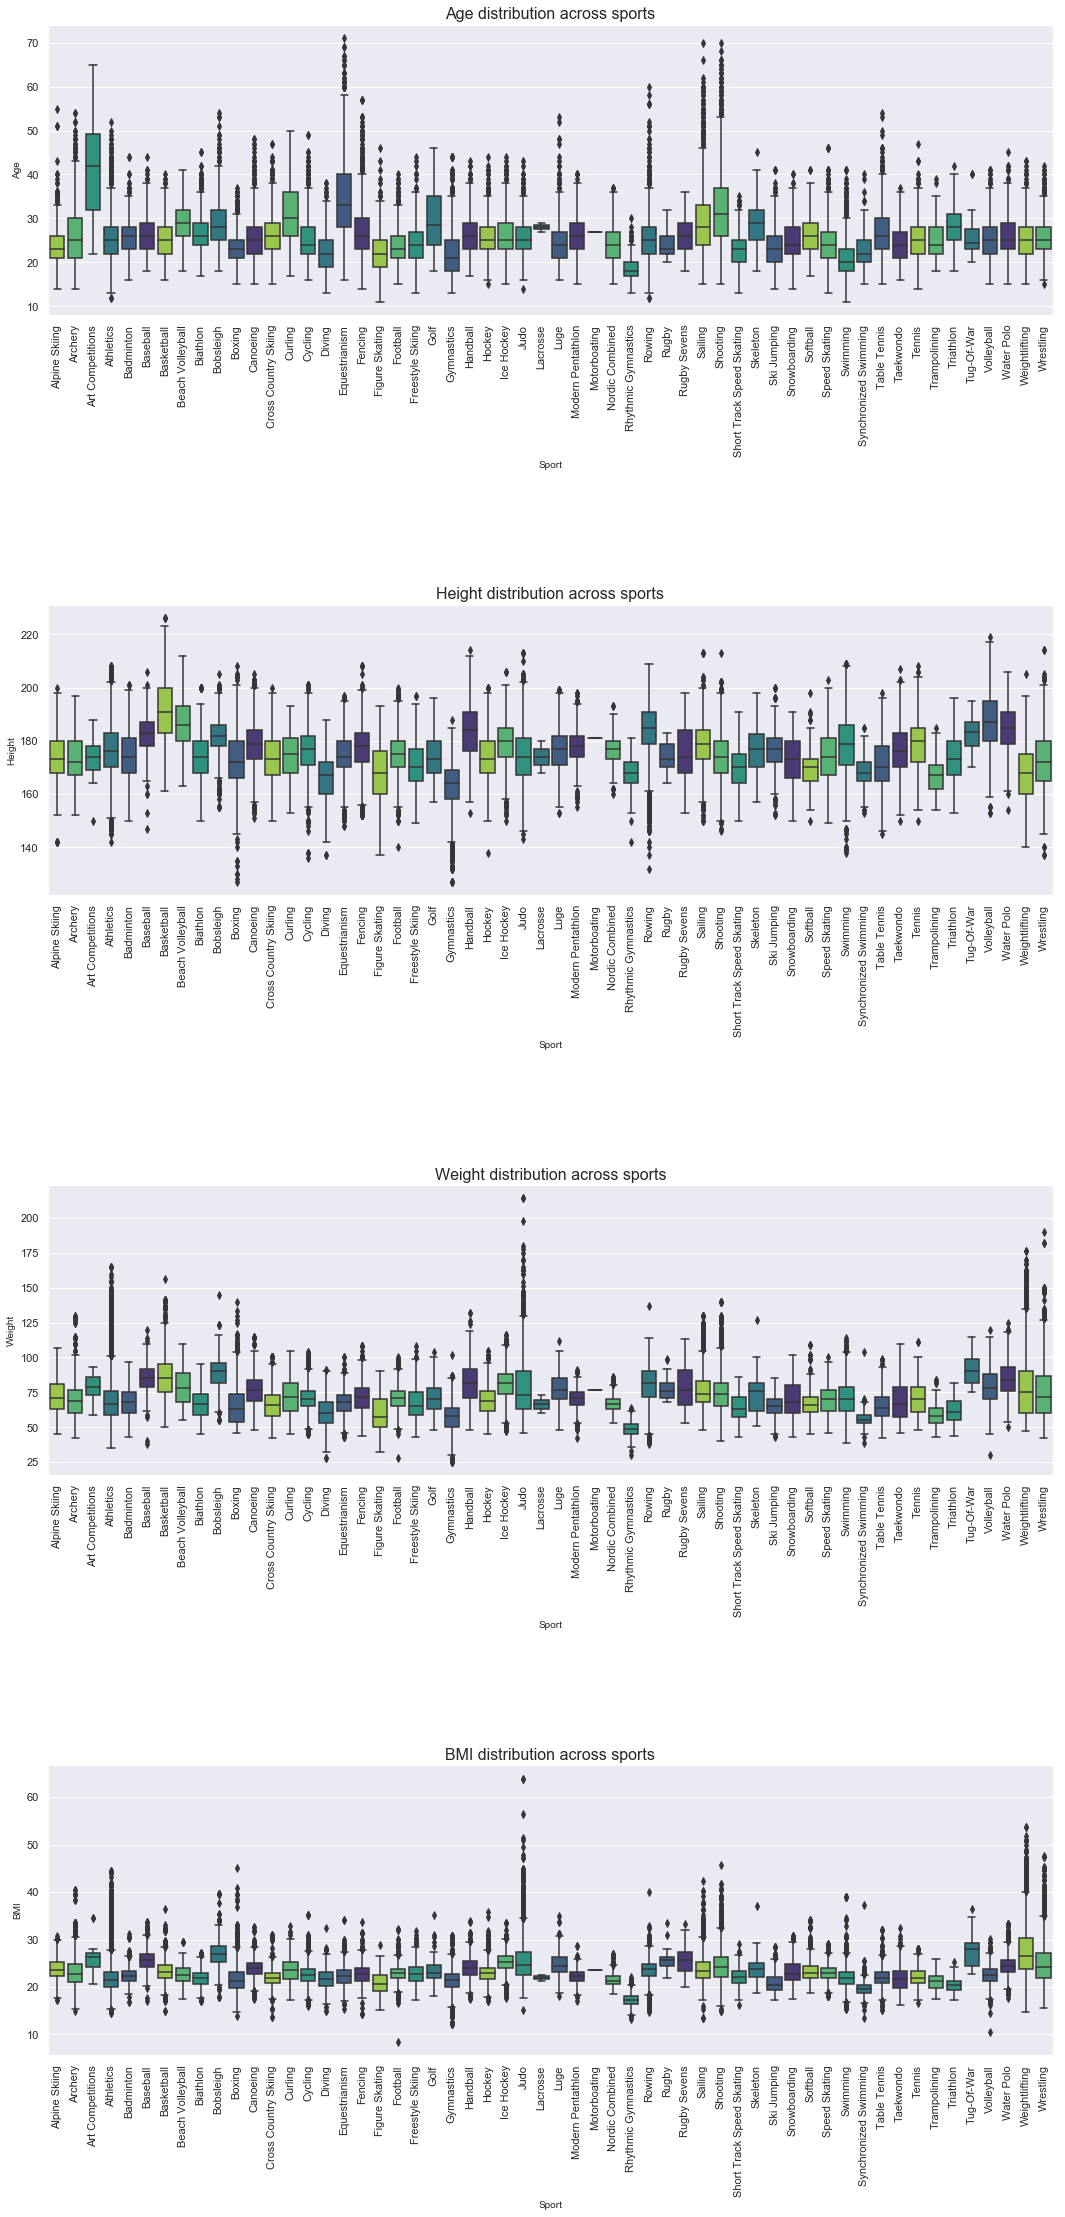

In [32]:
f, axes = plt.subplots(4, 1, figsize=(18, 24))

ax=sns.boxplot(x='Sport',y='Age',data=atheletenocClean,palette=sns.color_palette(palette='viridis_r'), ax = axes[0])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Sport',fontsize=10)
ax.set_ylabel('Age',fontsize=10)
ax.set_title('Age distribution across sports',fontsize=16)

ax=sns.boxplot(x='Sport',y='Height',data=atheletenocClean,palette=sns.color_palette(palette='viridis_r'), ax = axes[1])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Sport',fontsize=10)
ax.set_ylabel('Height',fontsize=10)
ax.set_title('Height distribution across sports',fontsize=16)

ax=sns.boxplot(x='Sport',y='Weight',data=atheletenocClean,palette=sns.color_palette(palette='viridis_r'), ax = axes[2])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Sport',fontsize=10)
ax.set_ylabel('Weight',fontsize=10)
ax.set_title('Weight distribution across sports',fontsize=16)
plt.subplots_adjust(wspace = 1, hspace = 1,top = 1.3)

ax=sns.boxplot(x='Sport',y='BMI',data=atheletenocClean,palette=sns.color_palette(palette='viridis_r'), ax = axes[3])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Sport',fontsize=10)
ax.set_ylabel('BMI',fontsize=10)
ax.set_title('BMI distribution across sports',fontsize=16)
plt.subplots_adjust(wspace = 1, hspace = 1,top = 1.3)

In [33]:
#Bubble chart of athelete's Height vs Weight grouped by Sport

tmp = atheletenocClean.groupby(['Sport'])['Height', 'Weight'].agg('mean')
df1 = pd.DataFrame(tmp).reset_index()
tmp = atheletenocClean.groupby(['Sport'])['ID'].count()

df2 = pd.DataFrame(tmp).reset_index()
dataset = df1.merge(df2) #DataFrame with columns 'Sport', 'Height', 'Weight', 'ID'

scatterplots = list()
for sport in dataset['Sport']:
    df = dataset[dataset['Sport']==sport]
    trace = go.Scatter(
        x = df['Height'],
        y = df['Weight'],
        name = sport,
        marker=dict(
            symbol='circle',
            sizemode='area',
            sizeref=10,
            size=df['ID'])
    )
    scatterplots.append(trace)
                         
layout = go.Layout(title='Mean height and weight by sport', 
                   xaxis=dict(title='Height, cm'), 
                   yaxis=dict(title='Weight, kg'),
                   showlegend=True)

fig = dict(data = scatterplots, layout = layout)
py.iplot(fig)

# Multi-Class Classification

__Feature Importance (Visualizing the percentage importance of variables in predicting the medal)__

[0.22380825 0.11863883 0.11827385 0.1351743  0.00501839 0.04485917
 0.15799604 0.19623117]


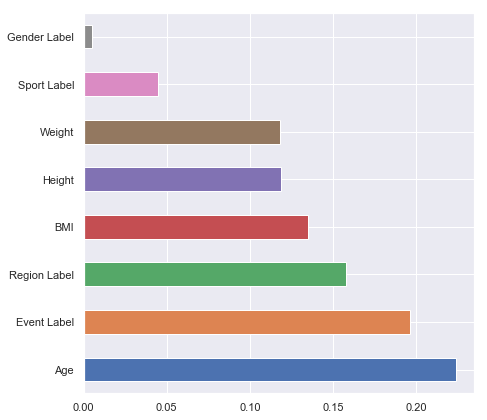

In [34]:
y = pd.DataFrame(atheletenocClean['Medal'])
x = pd.DataFrame(atheletenocClean[["Age", "Height", "Weight", "BMI", "Gender Label", "Sport Label", "Region Label", "Event Label"]])

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

f, axes = plt.subplots(1, 1, figsize=(7, 7))
model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

__Model 1 (No rebalancing with Naive Bayes classification)__

In [35]:
# Extract Response and Predictors
y = pd.DataFrame(atheletenocClean['Medal'])
x = pd.DataFrame(atheletenocClean[["Age", "Height", "Weight", "BMI", "Gender Label", "Sport Label", "Region Label", "Event Label"]])

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

Train Set : (154614, 1) (154614, 8)
Test Set  : (51538, 1) (51538, 8)


In [37]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Trx_trainain the model using the training sets
gnb.fit(x_train, y_train)

#Predict the response for train dataset
y_train_pred = gnb.predict(x_train)

#Predict the response for test dataset
y_pred = gnb.predict(x_test)

#Evaluating model by checking the accuracy using actual and predicted values

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8505180643408747


In [38]:
#Since there are no attribute values that have the probability zero(Zero Probability/Frequency Problem),
#there is no need for Laplacian correction.

Text(765.2272727272725, 0.5, 'Actual')

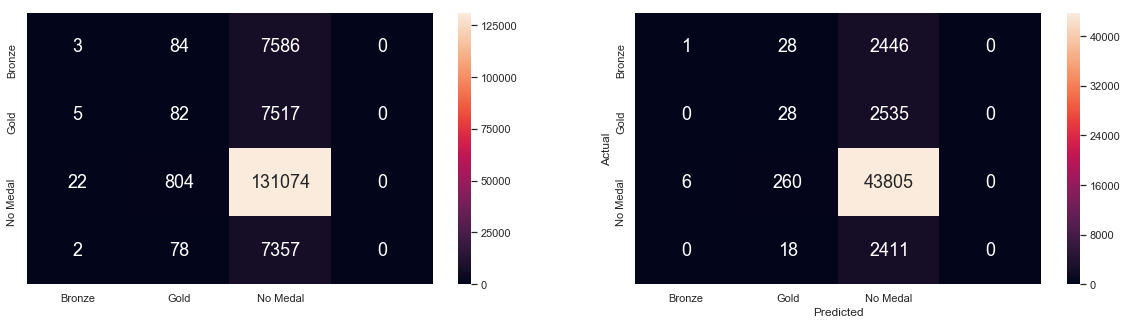

In [39]:
f, axes = plt.subplots(1, 2, figsize=(20, 5))

#Confusion matrix for train data
names = np.unique(y_train_pred)
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, xticklabels=names, yticklabels=names, ax = axes[0])
plt.xlabel('Predicted')
plt.ylabel('Actual')

#Confusion matrix for test data
names = np.unique(y_pred)
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, xticklabels=names, yticklabels=names, ax = axes[1])
plt.xlabel('Predicted')
plt.ylabel('Actual')

__Model 2 (ROS rebalancing with Decision Tree classification)__ 

In [40]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E',  'red']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [41]:
import imblearn

497732 new random picked points


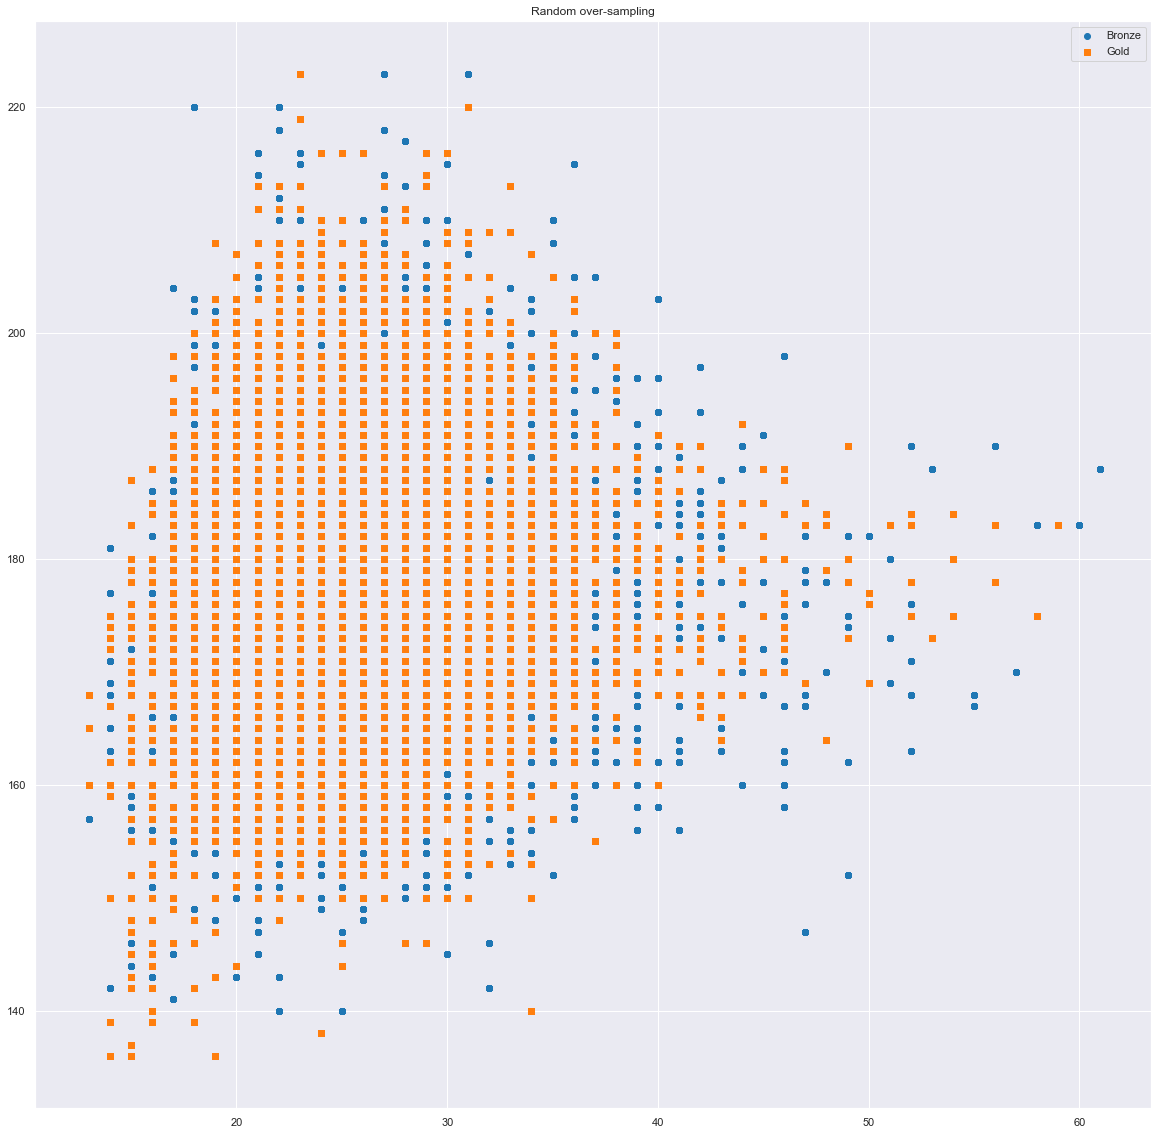

In [42]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

In [43]:
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_ros))

Resampled dataset shape Counter({'No Medal': 175971, 'Bronze': 175971, 'Gold': 175971, 'Silver': 175971})


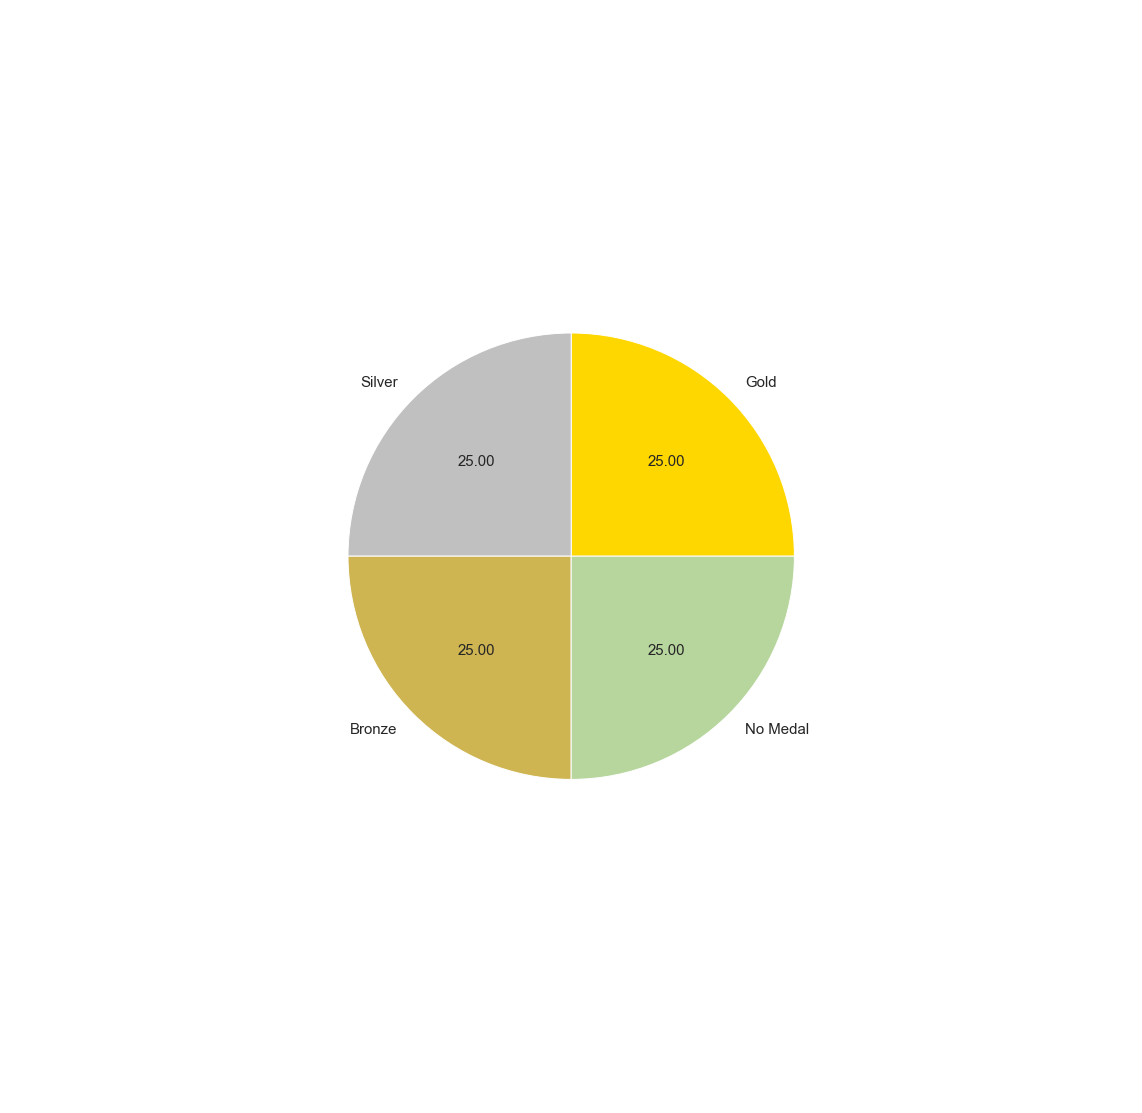

In [44]:
pie_dict_medal = {'Sector': ['Gold', 'Silver', 'Bronze', 'No Medal'],
            'Percentage': [25, 25, 25, 25]}

pie_df_medal = pd.DataFrame(pie_dict_medal)

plt.axis('equal')

colors = ['gold', 'silver', '#ceb552', '#b7d69e']

plt.pie(pie_df_medal['Percentage'], 
        labels=pie_df_medal['Sector'], 
        colors=colors,
        autopct='%.2f',
        radius=0.5,
        textprops={'fontsize': 15})

plt.show()

Train Set : (527913,) (527913, 8)
Test Set  : (175971,) (175971, 8)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8455711452455235

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8206522665666501



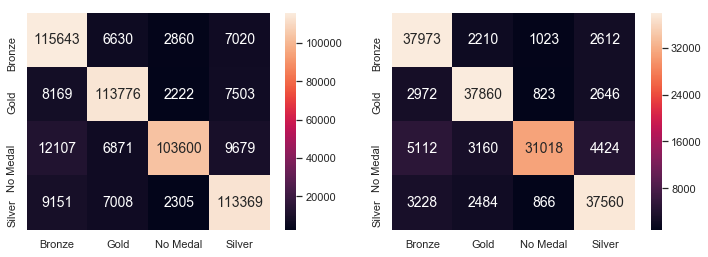

In [46]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 20)  # create the decision tree object
dectree.fit(x_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(x_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(x_test, y_test))
print()

names = np.unique(y_train_pred)
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 14}, xticklabels=names, yticklabels=names, ax = axes[0])

names = np.unique(y_test_pred)
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 14}, xticklabels=names, yticklabels=names, ax = axes[1])


__Model 3 (ROS rebalancing with Naive Bayes classification)__

Accuracy: 0.29770814509208904


Text(765.2272727272725, 0.5, 'Actual')

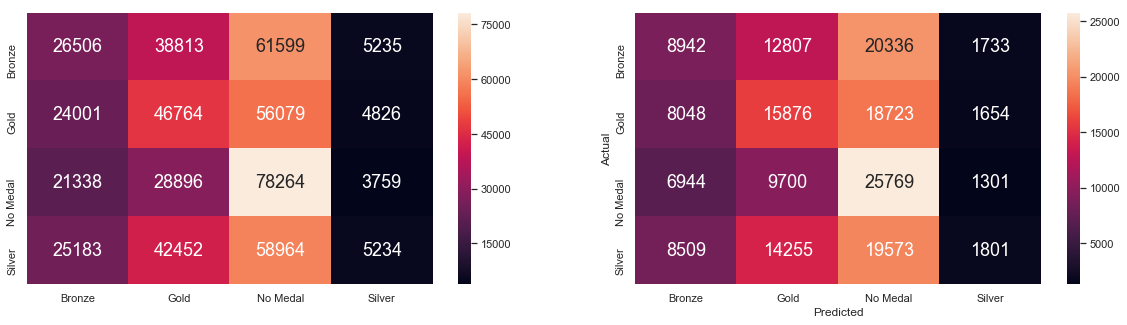

In [47]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(x_train, y_train)

#Predict the response for train dataset
y_train_pred = gnb.predict(x_train)

#Predict the response for test dataset
y_pred = gnb.predict(x_test)

#Evaluating model by checking the accuracy using actual and predicted values

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

f, axes = plt.subplots(1, 2, figsize=(20, 5))

#Confusion matrix for train data
names = np.unique(y_train_pred)
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, xticklabels=names, yticklabels=names, ax = axes[0])
plt.xlabel('Predicted')
plt.ylabel('Actual')

#Confusion matrix for test data
names = np.unique(y_pred)
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, xticklabels=names, yticklabels=names, ax = axes[1])
plt.xlabel('Predicted')
plt.ylabel('Actual')

__Model 4 (SMOTE & Tomek Links rebalancing with Decision Tree classification)__

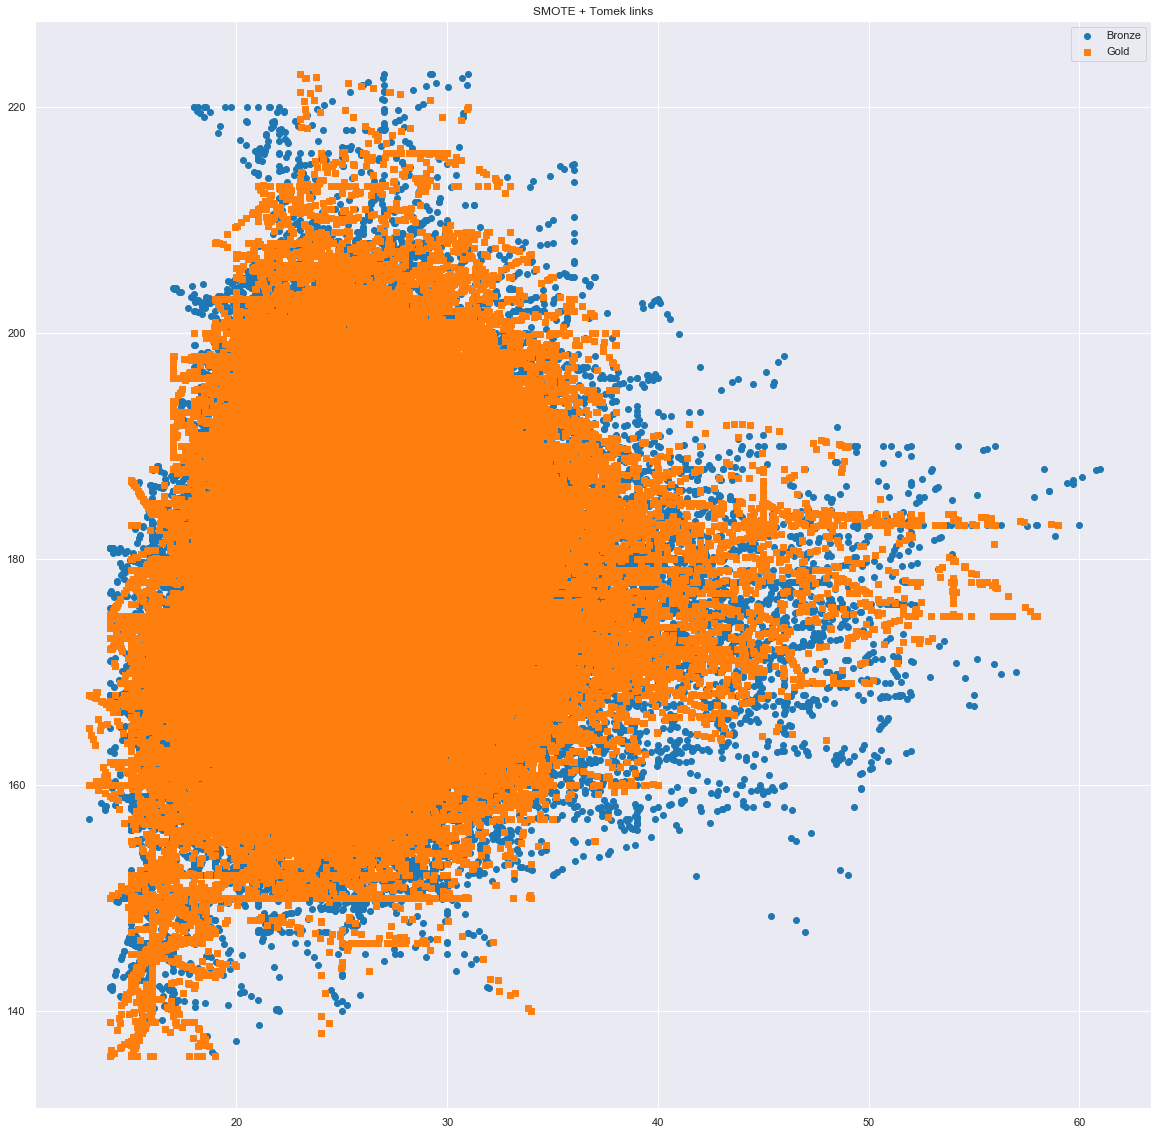

In [48]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(x, y)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')

Train Set : (520174,) (520174, 8)
Test Set  : (173392,) (173392, 8)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6577241461510956

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6073694288087109



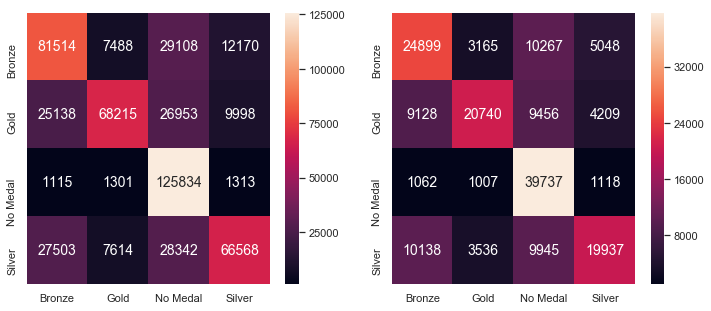

In [49]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)



# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 20)  # create the decision tree object
dectree.fit(x_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)



# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(x_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(x_test, y_test))
print()



# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 5))

names = np.unique(y_train_pred)
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           xticklabels=names, yticklabels=names, annot = True, fmt=".0f", annot_kws={"size": 14}, ax = axes[0])

names = np.unique(y_test_pred)
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           xticklabels=names, yticklabels=names, annot = True, fmt=".0f", annot_kws={"size": 14}, ax = axes[1])

__Model 5 (SMOTE & Tomek Links rebalancing with Naive Bayes classification)__

Accuracy: 0.30617329519239644


Text(765.2272727272725, 0.5, 'Actual')

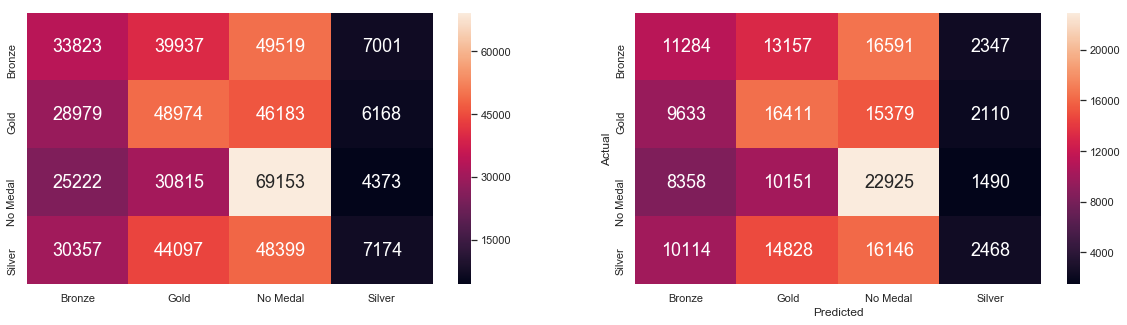

In [50]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(x_train, y_train)

#Predict the response for train dataset
y_train_pred = gnb.predict(x_train)

#Predict the response for test dataset
y_pred = gnb.predict(x_test)

#Evaluating model by checking the accuracy using actual and predicted values

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

f, axes = plt.subplots(1, 2, figsize=(20, 5))

#Confusion matrix for train data
names = np.unique(y_train_pred)
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, xticklabels=names, yticklabels=names, ax = axes[0])
plt.xlabel('Predicted')
plt.ylabel('Actual')

#Confusion matrix for test data
names = np.unique(y_pred)
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, xticklabels=names, yticklabels=names, ax = axes[1])
plt.xlabel('Predicted')
plt.ylabel('Actual')

__Model 6 (SMOTE & Tomek Links rebalancing with Random Forest classification)__ 

In [51]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

Y_train_pred=clf.predict(x_train)
y_test_pred=clf.predict(x_test)

In [52]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy train:",metrics.accuracy_score(y_train, y_train_pred))

print("Accuracy test:",metrics.accuracy_score(y_test, y_test_pred))

Accuracy train: 0.30590533167747713
Accuracy test: 0.9292470240841562


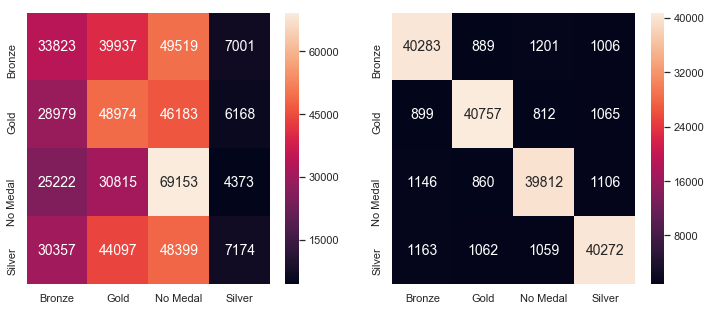

In [53]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 5))

names = np.unique(y_train_pred)
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           xticklabels=names, yticklabels=names, annot = True, fmt=".0f", annot_kws={"size": 14}, ax = axes[0])

names = np.unique(y_test_pred)
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           xticklabels=names, yticklabels=names, annot = True, fmt=".0f", annot_kws={"size": 14}, ax = axes[1])

In [54]:
#From observing the confusion matrix and the accuracy percentage, 
#Model 2 (ROS rebalancing with Decision Tree classification) is the best model. 

## References

<ul>
<li>https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets</li>
<li>https://www.kaggle.com/velavok/plotly-tutorial-for-interactive-plots</li>
<li>https://plot.ly/python/reference/</li>
    
<li>https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn</li>
<li>https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70</li>
<li>https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a</li>
<li>https://www.datacamp.com/community/tutorials/random-forests-classifier-python</li>

</ul>
